### [ 분류 ]
#### - 종속변수의 데이터 형태가 범주형 데이터일 때 분류를 실시
#### 이진분류 : 종속변수의 데이터 범주가 성별분류와 같이 2개중 1개를 선택할 때
#### 다중분류 : 종속변수의 데이터 범주가 성별분류와 같이 3개이상에서 1개를 선택할 때
#### <span style = 'color:red'>분류는 확률 데이터를 이용</span>
####  <span style = 'color:red'>- 확률 : 0~1 사이의 값으로 표현됨</span>
####  <span style = 'color:red'>- 2개 또는 3개 이상의 분류시 확률이 가장 높은 종속변수가 결정됨</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
fish = pd.read_csv('./data/05_생선_분류_데이터셋.csv')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


#### 독립변수 : Weight	Length	Diagonal	Height	Width
#### 종속변수 : Species	


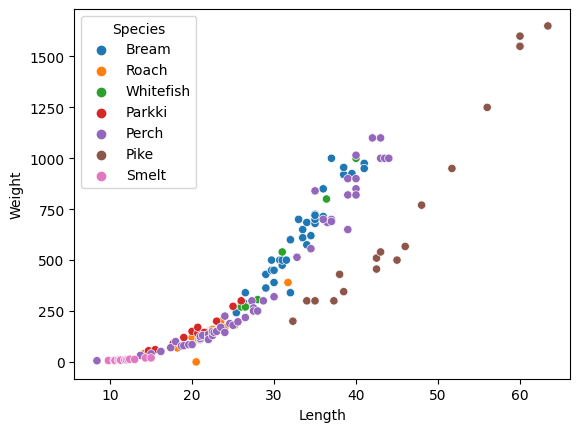

In [9]:
sns.scatterplot(data=fish, x='Length', y='Weight', hue='Species')
plt.show()

### 독립변수와 종속변수 분리
#### - 독립변수명 : fish_input
#### - 종속변수명 : fish_target
#### - 훈련에 사용하는 array배열 타입으로 최종 결과 넣고 차원확인

In [24]:
# 독립변수
fish_input = np.array(fish.iloc[:,1:])
fish_input = np.array(fish.select_dtypes('float64'))
fish_input.shape

(159, 5)

In [59]:
fish_target = np.array(fish.select_dtypes('object'))
fish_target = fish['Species'].to_numpy()
fish_target = np.array(fish['Species'])
# fish_target = np.array(fish.iloc[:,0:1]).reshape(-1,1)
fish_target.shape

(159,)

### 훈련 및 테스트 데이터 분리

In [32]:
from sklearn.model_selection import train_test_split as ts

In [40]:
train_input, test_input, train_target, test_target = ts(fish_input, fish_target, random_state=42, test_size=0.25)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((119, 5), (40, 5), (119,), (40,))

### 정규화(표준화)

In [41]:
from sklearn.preprocessing import StandardScaler as sc

In [42]:
std = sc()
std.fit(train_input)
train_scaled = std.transform(train_input)
test_scaled = std.transform(test_input)
train_scaled.shape, test_scaled.shape

((119, 5), (40, 5))

### KNN 분류모델 적용하기


In [52]:
from sklearn.neighbors import KNeighborsClassifier as kn

In [55]:
# 이웃의 갯수 3
knn = kn(n_neighbors=3)

In [58]:
# 훈련
knn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [57]:
# 평가
print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [62]:
# 종속변수에 생선 종류가 몇가지 있는지 확인하기
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### knn이 사용한 종속변수의 순서 확인

In [68]:
# 훈련모델의 종속변수 종류확인 : 오름차순으로 종류를 가지고 있음
knn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

### 예측하기
#### - test_scaled 데이터 이용
#### - test_scaled 데이터의 상위 5개만 사용해서 확인

In [75]:
print(knn.predict(test_scaled[:5]))
print(test_target[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


### 예측결과와 실제결과값을 비교할수 있도록 출력

In [78]:
np.column_stack((test_target[:5], knn.predict(test_scaled[:5])))

array([['Perch', 'Perch'],
       ['Smelt', 'Smelt'],
       ['Pike', 'Pike'],
       ['Whitefish', 'Perch'],
       ['Perch', 'Perch']], dtype=object)

### 훈련 데이터의 종속변수 예측확률 보기

In [81]:
proba = knn.predict_proba(test_scaled[:5])
# proba
np.round(proba,decimals=4)
# ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

### 로지스틱회귀분석(Logistic Regression)
#### [로지스틱 회귀분석 ]
#### - 이름은 회귀이지만 분류에서도 자주 사용됨
#### - 보통 분류모델로 많이 사용됨
#### - 선형회귀와 동일한 선형방정식이 사용됨

#### [ 로지스틱 회귀모델이 분류하는 방법 ]
#### - 종속변수 데이터의 범주의 갯수에 따라서 이진분류와 다중분류를 알아서 결정하고
#### - <span style = 'color:red'>분류시 분류함수를 적용함</span>
#### - 이진분류 함수 : 시그모이드(Sigmoid) 함수 
#### - 다중분류 함수 : 소프트맥스(Softmax) 함수 
#### -  <span style = 'color:red'>어떤 분류함수를 쓰더라도 결과는 0~1사이의 확률값을 만들어 냄</span>
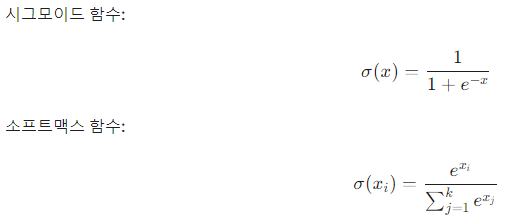
----
### 시그모이드 형태 시각화

In [83]:
import matplotlib.pyplot as plt

In [84]:
z = np.arange(-5,5,0.1)
z.shape

(100,)

In [93]:
# 시그모이드 계산하기
# exp() : 지수로 변환하는 함수
phi = 1/(1 + np.exp(-z))
phi[:3]

array([0.00669285, 0.00739154, 0.00816257])

### Sigmoid가 값을 결정하는 방법
#### - x축이 0일때 y축은 0.5
#### - y축을 기준으로 0.5보다 크면 결정

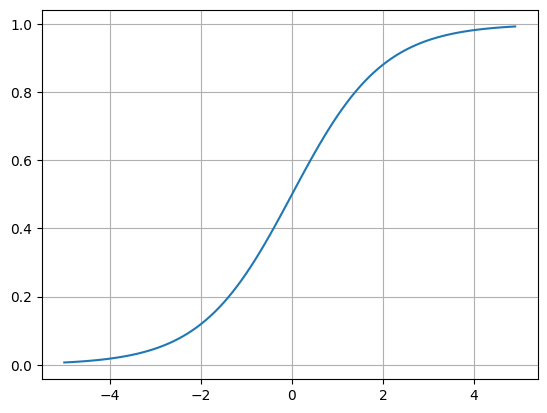

In [92]:
plt.plot(z,phi)
plt.grid()
plt.show()

### 사용하는 데이터 차원확인

In [95]:
# 차원확인
train_scaled.shape, train_target.shape
# 종속변수에는 7개의 물고기 종류가 있음
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### 이진분류
#### - train_target 데이터에서 물고기종류 2개만 추출하기 - 인덱스 위치를 찾아야 함
#### - 추출 범주명 : Bream, Smelt
#### - 종속변수명 : target_bream_smelt
#### - 훈련에 사용할 독립변수명 : train_bream_smelt

In [137]:
# 인덱스 위치 찾기
# idx = pd.DataFrame(train_target[(train_target == 'Bream')|(train_target == 'Smelt')]).index
idx_tr  = (train_target == 'Bream')|(train_target == 'Smelt')
idx_te  = (test_target == 'Bream')|(test_target == 'Smelt')

In [147]:
target_bream_smelt = train_target[idx_tr == True]
train_bream_smelt = train_scaled[idx_tr == True]
target_bream_smelt = train_target[idx_tr]
train_bream_smelt = train_scaled[idx_tr]

test_target_bream_smelt = test_target[idx_te == True]
test_bream_smelt = test_scaled[idx_te == True]


In [139]:
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [140]:
train_bream_smelt[:3]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737]])

### 로지스틱회귀 - 이진분류

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
# 클래스 생성
lcs = LogisticRegression()

In [143]:
# 훈련하기
lcs.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [144]:
# 정확도 확인
lcs.score(train_bream_smelt, target_bream_smelt)

1.0

In [145]:
# 상위 5개만 예측
lcs.predict(train_bream_smelt[:5])
np.column_stack((target_bream_smelt[:5],lcs.predict(train_bream_smelt[:5])))

array([['Bream', 'Bream'],
       ['Smelt', 'Smelt'],
       ['Bream', 'Bream'],
       ['Bream', 'Bream'],
       ['Bream', 'Bream']], dtype=object)

In [127]:
lcs.classes_

array(['Bream', 'Smelt'], dtype=object)

In [131]:
# 각 범주별로 계산된 확률값 확인
# ['Bream', 'Smelt']
lcs.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

### test data로 이진분류

In [151]:
lcs.score(test_bream_smelt,test_target_bream_smelt)

1.0

In [150]:
np.column_stack((test_target_bream_smelt[:5],lcs.predict(test_bream_smelt[:5])))

array([['Smelt', 'Smelt'],
       ['Bream', 'Bream'],
       ['Smelt', 'Smelt'],
       ['Bream', 'Bream'],
       ['Bream', 'Bream']], dtype=object)

### 시그모이드로 확률 값 확인
#### z값 확인하기
#### - 선형방정식에서 z값 계산 함수 : decision_function()

In [157]:
decision = lcs.decision_function(train_bream_smelt[:5])
decision

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

### 시그모이드 시각화하기
#### - y축 : z값의 최소부터 최대까지의 범위 값 산점하기
    

In [158]:
z = np.arange(decision.min(), decision.max(), 0.1)
z.shape

(97,)

In [159]:
# 시그모이드 계산하기
phi = 1/(1+ np.exp(-z))
phi.shape

(97,)

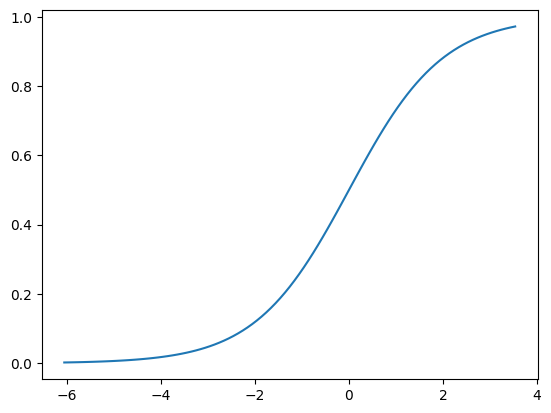

In [160]:
plt.plot(z,phi)
plt.show()

### 시그모이드 함수를 사용해서 5개 데이터의 확률값 구하기

In [161]:
from scipy.special import expit
# 확률 확인하기
expit(decision)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [162]:
# 오른쪽(두번째 열) 기준으로 확률값이 나옴
lcs.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [82]:
t1 = fish['Species'].to_numpy() # 1차원 값으로 반환
t2 = np.array(fish['Species']) # 1차원 값으로 반환
t3 = np.array(fish.iloc[:,0:1]).reshape(-1,1) # 2차원 값으로 반환
t4 = np.array(fish.select_dtypes('object')) # 2차원 값으로 반환


t1.shape, t2.shape, t3.shape, t4.shape

((159,), (159,), (159, 1), (159, 1))